# Data Extraction

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sale_df = pd.ExcelFile('/kaggle/input/sales-data/db_dump_version_2.xlsx')

In [4]:
customers_df = pd.read_excel(sale_df, 'customers')
date_df = pd.read_excel(sale_df, 'date')
markets_df = pd.read_excel(sale_df, 'markets')
products_df = pd.read_excel(sale_df, 'products')
transactions_df = pd.read_excel(sale_df, 'transactions')

# Data Cleaning

In [5]:
customers_df.shape
date_df.shape
markets_df.shape
products_df.shape
transactions_df.shape

(148395, 10)

In [6]:
customers_df.info()
print('**********************************************************')
date_df.info()
print('**********************************************************')
markets_df.info()
print('**********************************************************')
products_df.info()
print('**********************************************************')
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  38 non-null     object
 1   custmer_name   38 non-null     object
 2   customer_type  38 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB
**********************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1126 non-null   datetime64[ns]
 1   cy_date      1126 non-null   datetime64[ns]
 2   year         1126 non-null   int64         
 3   month_name   1126 non-null   object        
 4   date_yy_mmm  1126 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 44.1+ KB
**********************************************************
<class

#### Note: There is no unrelated or blank column in any dataframe but has null values in 1 column of **markets_df**

In [7]:
pd.isnull(markets_df)

,markets_code,markets_name,zone
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [8]:
pd.isnull(markets_df).sum()

markets_code    0
markets_name    0
zone            2
dtype: int64

In [9]:
#Drop a null values
markets_df.dropna(inplace = True)

In [10]:
#Correct the column names
transactions_df.rename(columns={'profit_margin':'profit','profit_margin_percentage':'profit_margin'},inplace=True)
date_df.rename(columns={'date':'order_date'}, inplace=True)
markets_df.rename(columns={'markets_code':'market_code'}, inplace=True)

In [11]:
# Merging all dataframes in one
df1 = transactions_df.merge(date_df, on = 'order_date', how = 'outer')
df2 = df1.merge(customers_df, on='customer_code', how='outer')
df3 = df2.merge(products_df, on='product_code', how='outer')
sale_df1 = df3.merge(markets_df, on='market_code', how='outer')

# Analysing the data

In [12]:
sale_df1.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin', 'profit',
       'cost_price', 'cy_date', 'year', 'month_name', 'date_yy_mmm',
       'custmer_name', 'customer_type', 'product_type', 'markets_name',
       'zone'],
      dtype='object')

In [13]:
sale_df1.groupby('markets_name')[['market_code']].count().sort_values('market_code', ascending = False)

,market_code
markets_name,
Nagpur,47670
Delhi NCR,44219
Ahmedabad,20035
Bhopal,13322
Mumbai,11321
Kochi,4920
Kanpur,2811
Hyderabad,2034
Chennai,1028


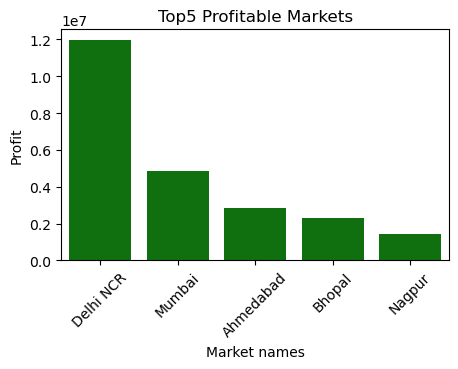

In [14]:
#proft made by markets

top5_sale = sale_df1.groupby('markets_name')[['profit']].sum().sort_values('profit', ascending = False).head(5)
plt.figure(figsize = (5,3))
sns.barplot(x = top5_sale.index, y = top5_sale['profit'], color='green')
plt.title('Top5 Profitable Markets')
plt.xticks(rotation = 45)
plt.xlabel('Market names')
plt.ylabel('Profit');

**Here, we can see 'Delhi NCR' is top-most market which made highest profit in these times. And 'Mumbai','Ahmedabad','Bhopal' & 'Nagpur' also generates more profit as compared to other market places.**

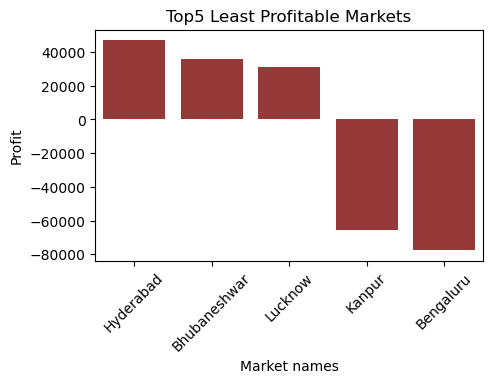

In [15]:
#Least Profitable Markets

top5_sale = sale_df1.groupby('markets_name')[['profit']].sum().sort_values('profit', ascending = False).tail(5)
plt.figure(figsize = (5,3))
sns.barplot(x = top5_sale.index, y = top5_sale['profit'], color='brown')
plt.title('Top5 Least Profitable Markets')
plt.xticks(rotation = 45)
plt.xlabel('Market names')
plt.ylabel('Profit');

**This graph represent that 'Kanpur' & 'Bengaluru' are loss making market places and 'Lucknow' is a least profit generating market place.**

In [16]:
sale_df1.groupby('customer_type')[['customer_code']].count()

,customer_code
customer_type,
Brick & Mortar,96190
E-Commerce,52205


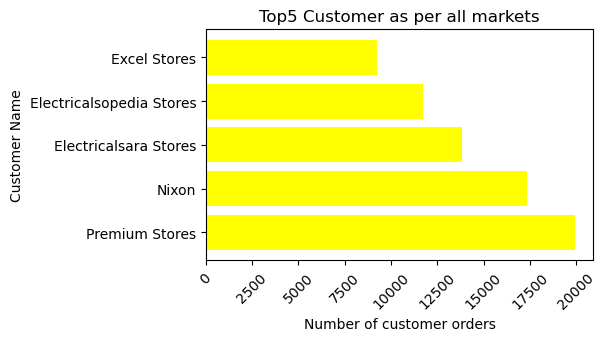

In [17]:
#Customers loyalty

top5_cust = sale_df1.groupby('custmer_name')[['markets_name']].count().sort_values('markets_name',ascending=False).head(5)
plt.figure(figsize = (5,3))
plt.barh(top5_cust.index, top5_cust['markets_name'], color='yellow')
plt.title('Top5 Customer as per all markets')
plt.xticks(rotation = 45)
plt.xlabel('Number of customer orders')
plt.ylabel('Customer Name');

**We can see from above that 'Premium stores' made most of the orders and including them 'Nixon', 'Electricalsara Stores', 'Electricalsopedia Stores', 'Excel Stores' also our Top5 loyal customers.**

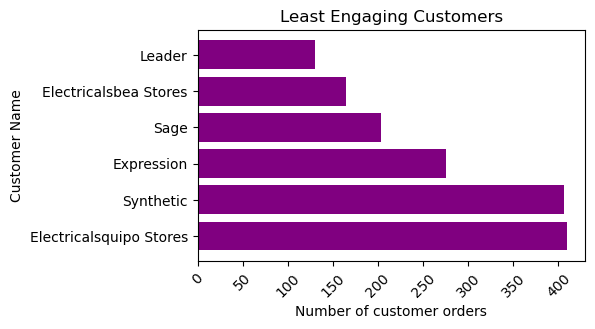

In [18]:
#Customers whose number of orders is less than 500

top5_cust = sale_df1.groupby('custmer_name')[['markets_name']].count().sort_values('markets_name',ascending=False).tail(6)
plt.figure(figsize = (5,3))
plt.barh(top5_cust.index, top5_cust['markets_name'], color='purple')
plt.title('Least Engaging Customers')
plt.xticks(rotation = 45)
plt.xlabel('Number of customer orders')
plt.ylabel('Customer Name');

**Through this graph we can say 'Electricalsquipo Stores', 'Synthetic', 'Expression', 'Sage', 'Electricalsbea Stores' & 'Leader' are the customers whose number of orderings are less than 500.**

In [19]:
sale_df1.groupby('product_type')[['product_code']].count()

,product_code
product_type,
Distributionr,33579
Own Brandr,60217


              sales_qty  sales_amount
markets_name                         
Delhi NCR      988294.0   519514271.0
Mumbai         383643.0   150084801.0
Nagpur         262094.0    55026321.0
Kochi          255482.0    18813466.0
Ahmedabad      206925.0   132307441.0
Bhopal         112740.0    58609861.0
Hyderabad       77889.0     7436823.0
Chennai         50485.0    18042702.0
Lucknow         37092.0     3094007.0
Surat           17099.0     2605796.0
Kanpur          16642.0    13582609.0
Bhubaneshwar    14979.0      893857.0
Patna            5505.0     4428393.0
Bengaluru         413.0      373115.0


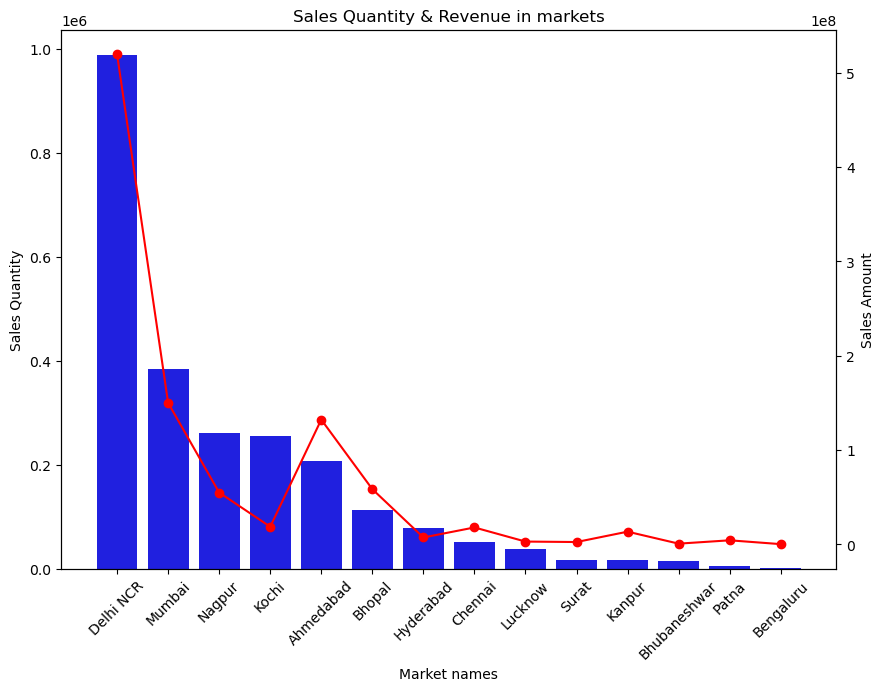

In [20]:
#Markets Sale quantity VS Markets Sale revenue

sale_qr = sale_df1.groupby('markets_name')[['sales_qty','sales_amount']].sum().sort_values('sales_qty', ascending = False)
print(sale_qr)

plt.figure(figsize = (10,7))
sns.barplot(x = sale_qr.index, y = sale_qr['sales_qty'], color='blue')
plt.xticks(rotation = 45)
plt.title('Sales Quantity & Revenue in markets')
plt.xlabel('Market names')
plt.ylabel('Sales Quantity')

plt.twinx()
plt.plot(sale_qr.index, sale_qr['sales_amount'], color='red', marker='o')
plt.ylabel('Sales Amount');

**Above graph shows 'Delhi NCR' is top market place in selling quantity and generating revenue. And Comparing to it other markets like 'Mumbai', 'Nagpur', 'Kochi' & 'Hyderabad' generate less revenue by selling compartively more quantity.**

**Reasons:**
1. That 4 market places engaged more in low generating revenue products. 
2. That 4 Market places Cost of living less than others. So, they use differentiate pricing system.

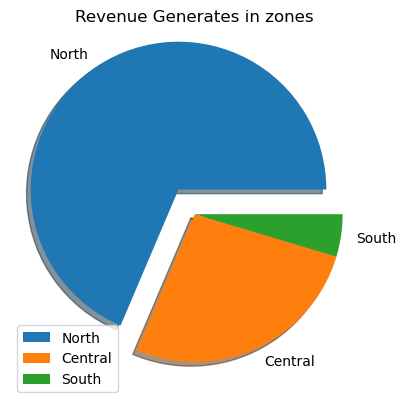

In [21]:
#zonal revenue

zonedata = sale_df1.groupby('zone')[['sales_amount']].sum().sort_values('sales_amount', ascending = False)
myexplode = [0.2, 0, 0]
plt.pie(zonedata['sales_amount'], labels = zonedata.index, explode = myexplode, shadow = True);
plt.title('Revenue Generates in zones')
plt.legend();

**Company markets set up in 3-zones i.e., North, Central & south.**

**Though above pie chart We can see that North zone generates more revenue than other two's and South zone generates the least.**

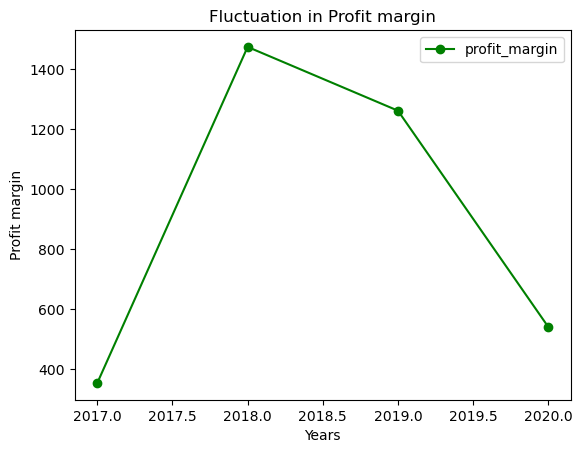

In [22]:
# profit margin in recent past years(2017,2018,2019,2020)

salerev = sale_df1.groupby('year')[['profit_margin']].sum().sort_values('year', ascending = False)
plt.plot(salerev.index, salerev['profit_margin'], label='profit_margin', marker='o', color='green')

plt.xlabel('Years')
plt.ylabel('Profit margin')
plt.title('Fluctuation in Profit margin')
plt.legend();

**This line graph shows that profit margin from 2017 to 2018 is in increasing phase and in 2018 it is in peak point. After that it decreases upto certain level and in 2020 their rate of diminishing increases.**

# Conclusion

**In the sale analysis from 2017 to 2020. We came to know that North zone generates more revenue. Moreover, 'Delhi NCR' shows good response by making highest profit & selling good amount of quantities and on other side 'Kanpur' & 'Bengaluru' are loss making market places. From customer sides,'Premium stores' made highest orders and 'Leader'are least ordering customer. With all of that profit margin also decreases from 2018.**